## 1. Introducción

En este proyecto, estamos realizando un análisis A/B de una plataforma web para **Vanguard**, donde comparamos dos versiones diferentes de la página: la **versión antigua (Control)** y la **versión nueva (Test)**. El objetivo principal de este análisis es determinar si la nueva versión de la web (Test) mejora el rendimiento en términos de la experiencia del usuario en comparación con la versión anterior (Control).

### Propósito del Análisis

El objetivo del análisis es evaluar el **rendimiento de los usuarios** en la nueva web frente a la antigua, basándonos en diferentes métricas clave:

- **Tasa de finalización**: Proporción de usuarios que completan con éxito el proceso en la web. Se estudian dos grupos principales:
  - **Lineal**: Usuarios que completan todos los pasos de manera correcta y en orden.
  - **No lineal**: Usuarios que no completan los pasos en orden correcto, retroceden o repiten pasos más de dos veces.

- **Tiempos empleados en cada paso**: Medimos el tiempo promedio que los usuarios tardan en completar cada paso del proceso, lo que nos permitirá detectar mejoras o retrocesos en la eficiencia de la nueva web.

- **Tasa de errores**: Analizamos los errores cometidos en el proceso, como retrocesos o repeticiones de pasos, para entender si la nueva versión ha reducido los problemas de navegación.

### Pruebas estadísticas aplicadas

Para validar los resultados y sacar conclusiones estadísticas sólidas, hemos aplicado varias pruebas estadísticas:

- **Asimetría (Skewness)** y **Curtosis (Kurtosis)**: Evaluamos la distribución de los tiempos de finalización en cada paso para detectar sesgos o valores extremos.
- **Prueba Z**: Para comparar las tasas de finalización entre los grupos Test y Control.
- **T-test**: Para comparar los tiempos de finalización entre Test y Control, y entre usuarios lineales y no lineales.
- **Prueba Mann-Whitney**: Una prueba no paramétrica utilizada cuando los datos no siguen una distribución normal, aplicada tanto para comparar Test vs Control como lineal vs no lineal.
- **Chi-square** y **Cramér's V**: Para medir la relación entre el grupo (Test o Control) y la finalización del proceso (lineal o no lineal).
- **Correlaciones de Pearson y Spearman**: Para analizar la relación entre variables como el balance, edad, actividad, y número de cuentas.

Este análisis nos permitirá concluir si la nueva versión de la web tiene un impacto positivo en la experiencia del usuario, proporcionando insights valiosos para futuras mejoras.


### Objetivo clave

- **¿La nueva interfaz de usuario (Test) mejora las tasas de finalización, reduce los tiempos de navegación y disminuye la tasa de errores en comparación con la versión anterior (Control)?**

----

## 2. Carga, limpieza y construcción del DataFrame final

En este apartado se detallan los pasos para cargar, limpiar, clasificar y construir el DataFrame final que servirá de base para el análisis del experimento A/B. El objetivo es unificar todos los datos relevantes en un solo conjunto, listo para aplicar las técnicas estadísticas y generar las visualizaciones necesarias.

### 2.1 Carga y limpieza de los datos

Primero, cargamos los tres conjuntos principales de datos:

- **Datos demográficos de los clientes**: Incluye información sobre el perfil de los usuarios como edad, balance, actividad, y número de cuentas.
- **Datos del experimento A/B**: Contiene información sobre la versión de la web que usó cada cliente (Test o Control) y los pasos completados.
- **Datos de interacción web**: Registra las acciones de los clientes en la web, como tiempos de finalización de cada paso y errores cometidos.

### 2.2 Clasificación de los clientes

Tras la limpieza y unificación de los datos, los clientes se clasifican en tres categorías principales, basadas en su balance, número de cuentas, actividad y tiempo de permanencia. Estas clasificaciones se realizan utilizando los percentiles de dichas métricas para identificar a los usuarios más valiosos:

- **General**: Clientes que se encuentran dentro del rango promedio en las métricas analizadas.
- **Above Mean**: Clientes que se encuentran por encima de la media, pero no forman parte del top.
- **Top 10%**: Los clientes más valiosos, con los balances, actividad y número de cuentas más altos.

Esta clasificación permite comparar el comportamiento de distintos segmentos de usuarios dentro del proceso web.

### 2.3 Análisis de los pasos completados

Para evaluar la experiencia de los usuarios en la web, analizamos los pasos que completaron durante el proceso de navegación. Este análisis es crucial para entender qué usuarios siguieron el flujo de manera correcta y cuáles encontraron dificultades. Para ello, creamos varias columnas adicionales en el DataFrame:

- **Linealidad (lineal)**: Indica si los usuarios completaron los pasos de manera correcta y en el orden adecuado. Un valor `True` indica que el proceso fue completado sin errores, mientras que `False` indica que hubo retrocesos o desorden en los pasos.
  
- **Número de repeticiones (step_repeat_count)**: Esta columna cuenta el número de veces que un cliente repitió un mismo paso. Si un usuario repite un paso más de dos veces, se considera un comportamiento no lineal.

- **Errores (error)**: Captura si un usuario cometió errores al retroceder o repetir pasos más de dos veces. Esto es crucial para entender los puntos de fricción en el proceso de navegación y la eficiencia de la nueva versión de la web.

### 2.4 Construcción del DataFrame final

El último paso en la preparación de los datos es combinar toda la información relevante en un único DataFrame. Este DataFrame final contendrá los datos demográficos de los clientes, los resultados del experimento A/B (Test vs Control) y la información de los pasos completados en la web.

El DataFrame resultante, denominado `df_vanguard`, será la base para el análisis estadístico, donde evaluaremos las métricas clave como las tasas de finalización, los tiempos empleados en cada paso y la tasa de errores.

In [1]:
import sys
import os
import pandas as pd  # Añadimos pandas aquí para usar pd.set_option()

# Añadir la ruta donde está ubicado 'main.py'
sys.path.append(os.path.abspath('../src'))

from main import (cargar_datos, limpiar_datos, filtrar_por_clientes_comunes, convertir_tipos_datos, renombrar_columnas_y_fusionar, calcular_medias_percentiles, 
                  clasificar_clientes, analizar_pasos, construir_df_vanguard, calculate_completion_rates, plot_completion_rates, plot_avg_time_in_steps,
                  plot_error_rate, calculate_and_plot_time_stats, calculate_and_plot_time_per_step, calculate_pearson_spearman_corr, z_test_completion_rates,
                  t_test_time_per_step, mann_whitney_test_variation, mann_whitney_test_lineal, chi_square_and_cramers_v)

In [2]:
# 1. Cargar los datos
df_final_demo, df_final_experiment_clients, df_pt = cargar_datos()

# 2. Limpiar los datos
df_final_demo, df_final_experiment_clients, df_pt = limpiar_datos(df_final_demo, df_final_experiment_clients, df_pt)

# 3. Filtrar los client_ids comunes
df_final_demo, df_final_experiment_clients, df_pt = filtrar_por_clientes_comunes(df_final_demo, df_final_experiment_clients, df_pt)

# 4. Convertir tipos de datos
df_final_demo, df_pt = convertir_tipos_datos(df_final_demo, df_pt)

# 5. Renombrar columnas y fusionar DataFrames
df_final, df_pt = renombrar_columnas_y_fusionar(df_final_experiment_clients, df_final_demo, df_pt)

# 6. Clasificar clientes
medias = calcular_medias_percentiles(df_final)
df_final = clasificar_clientes(df_final, medias[:4], medias[4:])

# 7. Analizar pasos en df_pt
df_pt = analizar_pasos(df_pt)

# 8. Construir el DataFrame final df_vanguard
df_vanguard = construir_df_vanguard(df_final, df_pt)

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame final
df_vanguard

,client_id,visitor_id,visit_id,step,date_time,step_order,step_diff,non_linear,step_repeat_count,time_diff,total_time_in_step,lineal,variation,tenure_years,tenure_months,age,gender,num_accounts,balance,calls_6_months,logons_6_months,group,activity,age_group,balance_category,activity_category,tenure_category
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,1,0.0,False,1,0.0,0.0,True,Test,3,46,29.5,U,2,25454.66,2,6,General,8,Young,Low,Medium,0-5
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2,1.0,False,1,7.0,7.0,True,Test,3,46,29.5,U,2,25454.66,2,6,General,8,Young,Low,Medium,0-5
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3,1.0,False,1,32.0,39.0,True,Test,3,46,29.5,U,2,25454.66,2,6,General,8,Young,Low,Medium,0-5
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,4,1.0,False,1,99.0,138.0,True,Test,3,46,29.5,U,2,25454.66,2,6,General,8,Young,Low,Medium,0-5
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,5,1.0,False,1,20.0,158.0,True,Test,3,46,29.5,U,2,25454.66,2,6,General,8,Young,Low,Medium,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,5,1.0,False,1,21.0,75.0,True,Test,10,124,31.0,F,3,107059.74,6,9,General,15,Young,High,High,6-10
317119,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,1,0.0,False,1,0.0,0.0,False,Test,10,124,31.0,F,3,107059.74,6,9,General,15,Young,High,High,6-10
317120,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,2,1.0,False,1,15.0,15.0,False,Test,10,124,31.0,F,3,107059.74,6,9,General,15,Young,High,High,6-10
317121,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,1,0.0,False,1,0.0,0.0,False,Test,23,281,49.0,F,2,431887.61,1,4,General,5,Middle-aged,High,Low,21+


----

## 3. Análisis de tasas de finalización y errores

En este apartado se analiza cómo los usuarios completan el proceso de navegación en la web, comparando los resultados entre los grupos Test (nueva versión) y Control (versión antigua). También se examinan los usuarios que completaron el proceso de manera lineal frente a los que no lo hicieron, evaluando la tasa de finalización y la tasa de errores.

### 3.1 Tasa de finalización

La tasa de finalización mide el porcentaje de usuarios que completaron el proceso de manera lineal. El análisis se divide entre:

- **Lineal=True**: Usuarios que completaron el proceso sin retroceder ni repetir pasos.
- **Lineal=False**: Usuarios que retrocedieron o repitieron pasos más de dos veces.

In [3]:
# Llamar a la función para calcular las tasas
completion_rate_true, completion_rate_false, suma_tasas = calculate_completion_rates(df_vanguard)

# Mostrar los resultados
print("Tasa de finalización (lineal=True):")
print(completion_rate_true)

print("\nTasa de no finalización (lineal=False):")
print(completion_rate_false)

print("\nSuma de tasas para cada grupo (debería ser cercana a 1):")
print(suma_tasas)

Tasa de finalización (lineal=True):
variation
Control    0.460554
Test       0.474649
Name: client_id, dtype: float64

Tasa de no finalización (lineal=False):
variation
Control    0.539446
Test       0.525351
Name: client_id, dtype: float64

Suma de tasas para cada grupo (debería ser cercana a 1):
variation
Control    1.0
Test       1.0
Name: client_id, dtype: float64


### 3.2 Tasa de errores

La tasa de errores mide cuántos usuarios experimentaron dificultades durante el proceso, ya sea por retroceder en los pasos o por repetirlos más de dos veces. Este análisis es esencial para identificar los puntos críticos donde los usuarios tienen problemas, tanto en la versión antigua de la web (grupo Control) como en la nueva (grupo Test).

Para calcular la tasa de errores, se define una nueva columna **error**, que es `True` cuando un usuario retrocede en los pasos o repite un paso más de dos veces, y `False` cuando no presenta este comportamiento.

La función `plot_error_rate()` se encarga de calcular esta tasa de errores para cada paso, diferenciando entre usuarios que completaron el proceso de manera lineal y aquellos que no lo hicieron. Luego, se generan gráficos comparativos entre el grupo Test y el grupo Control.

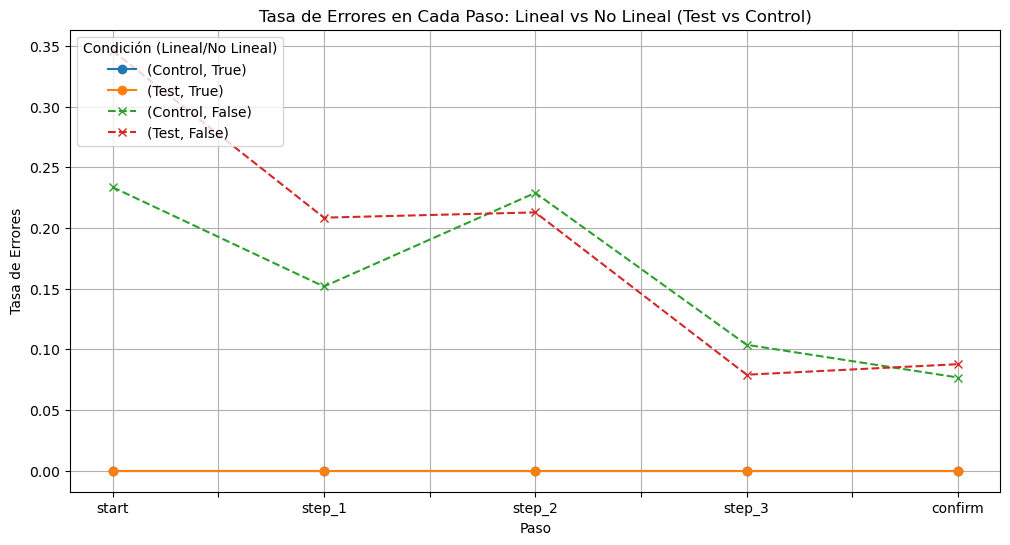

step                 start    step_1    step_2    step_3   confirm
variation lineal                                                  
Control   False   0.233686  0.151832  0.228995  0.103792  0.076825
          True    0.000000  0.000000  0.000000  0.000000  0.000000
Test      False   0.346152  0.208578  0.212911  0.079138  0.087799
          True    0.000000  0.000000  0.000000  0.000000  0.000000


In [4]:
# Definir el orden correcto de los pasos
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Llamar a la función para tasas de errores y mostrar los datos
error_rate = plot_error_rate(df_vanguard, step_order)
print(error_rate)

### 3.3 Visualización de las tasas de finalización

Para facilitar la interpretación de las tasas de finalización, se utiliza una visualización comparativa en forma de gráfico de barras. Esta visualización muestra claramente la diferencia entre los grupos Test (nueva versión de la web) y Control (versión antigua), tanto para los usuarios que completaron el proceso de manera lineal como para aquellos que no lo hicieron.

El gráfico destaca la proporción de usuarios que completaron el proceso de manera correcta y sin errores, permitiendo identificar si la nueva versión de la web ha mejorado la tasa de finalización respecto a la anterior.

La función `plot_completion_rates()` genera el gráfico de barras, utilizando las tasas de finalización calculadas previamente en la sección 3.1.

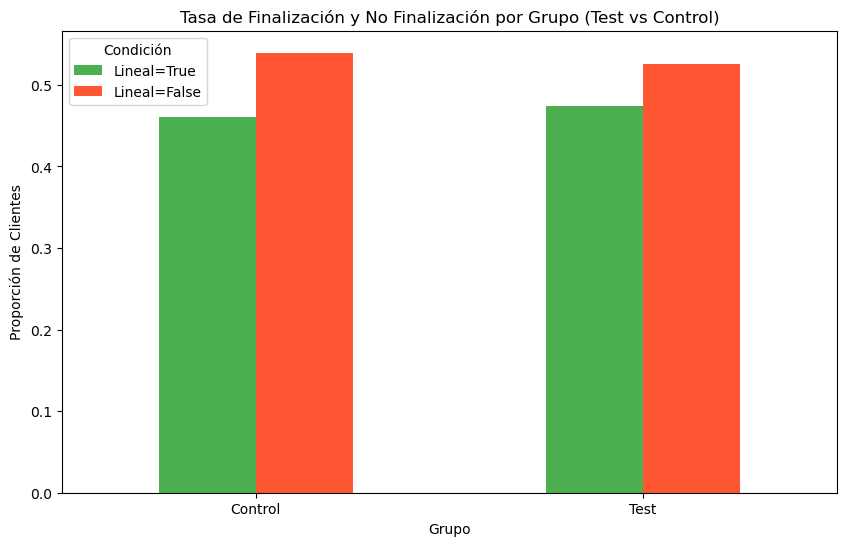

In [5]:
# Llamar a la función para generar el gráfico
plot_completion_rates(completion_rate_true, completion_rate_false)

----

## 4. Análisis de tiempos de finalización por paso

En este apartado se analiza el tiempo que los usuarios tardan en completar cada paso del proceso de navegación, comparando los grupos Test (nueva versión de la web) y Control (versión antigua), y diferenciando entre usuarios lineales (que completan el proceso sin errores) y no lineales (que retroceden o repiten pasos). Este análisis es crucial para evaluar la eficiencia del nuevo diseño de la web y detectar posibles áreas de mejora.

### 4.1 Tiempos promedio por paso

El análisis de los tiempos promedio en cada paso revela cuánto tiempo dedican los usuarios a completar cada uno de ellos, lo que nos permite identificar pasos problemáticos donde los usuarios pasan más tiempo de lo esperado. Se genera un gráfico de líneas para comparar los tiempos entre Test y Control, tanto para usuarios lineales como no lineales.

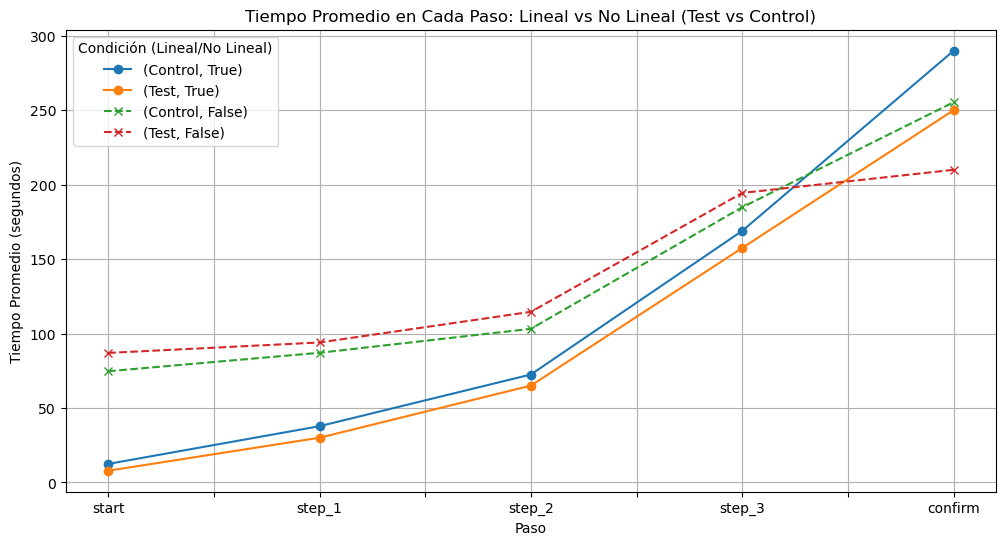

step                  start     step_1      step_2      step_3     confirm
variation lineal                                                          
Control   False   74.734189  87.124677  103.223602  184.890220  255.394645
          True    12.470965  37.820651   72.524611  169.012851  289.998462
Test      False   87.029394  94.041990  114.630338  194.486771  210.016980
          True     7.906919  30.073394   65.061841  157.540025  250.060112


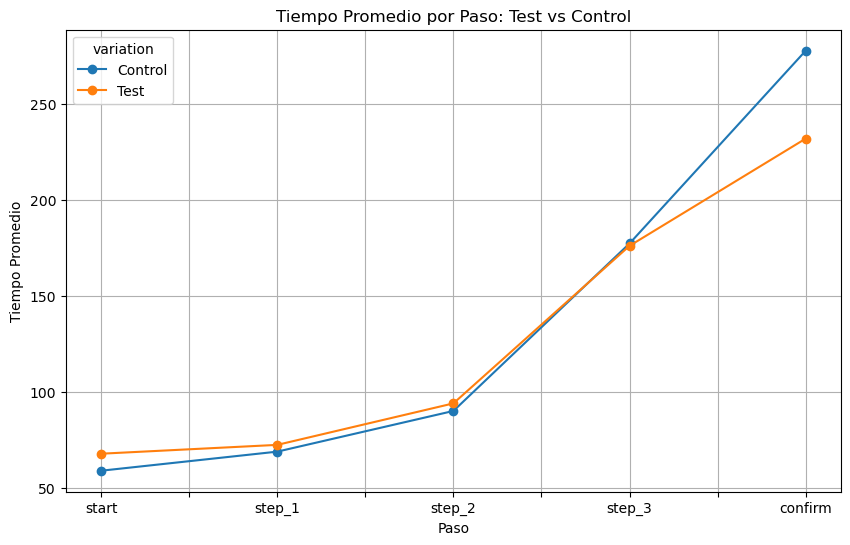

step           start     step_1     step_2      step_3     confirm
variation                                                         
Control    58.873614  68.805743  89.981952  177.145988  277.470079
Test       67.727387  72.326330  93.922235  175.920870  231.723568


In [6]:
# Definir el orden correcto de los pasos
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Llamar a la función para tiempos promedio y mostrar los datos
avg_time_in_step_lineal = plot_avg_time_in_steps(df_vanguard, step_order)
print(avg_time_in_step_lineal)

# Llamar a la función para calcular los tiempos promedio y graficar
df_time_per_step = calculate_and_plot_time_per_step(df_vanguard, step_order)

# Mostrar los datos después del gráfico
print(df_time_per_step)

### 4.2 Estadísticas de tiempos: Media, Skewness, y Kurtosis

Además del análisis de los tiempos promedio, es crucial analizar la forma de la distribución de los tiempos en cada paso para obtener una visión más detallada del comportamiento de los usuarios. Para ello, se calculan las siguientes métricas:

- **Media**: El tiempo promedio que los usuarios dedican a cada paso.
- **Skewness (asimetría)**: Indica si los tiempos están sesgados hacia un lado de la media. Valores positivos de skewness sugieren que la mayoría de los usuarios completan rápidamente los pasos, pero unos pocos toman mucho más tiempo.
- **Kurtosis (curtosis)**: Mide la "cola" de la distribución, mostrando si hay valores extremos de tiempo (usuarios que pasan tiempos excepcionalmente largos en ciertos pasos). Una kurtosis alta indica que algunos usuarios tienen tiempos muy elevados en comparación con la mayoría.

#### Cálculo y visualización de las estadísticas

A continuación, se calculan estas métricas para cada paso (start, step_1, step_2, step_3 y confirm), diferenciando entre los grupos Test y Control, y entre usuarios lineales y no lineales.

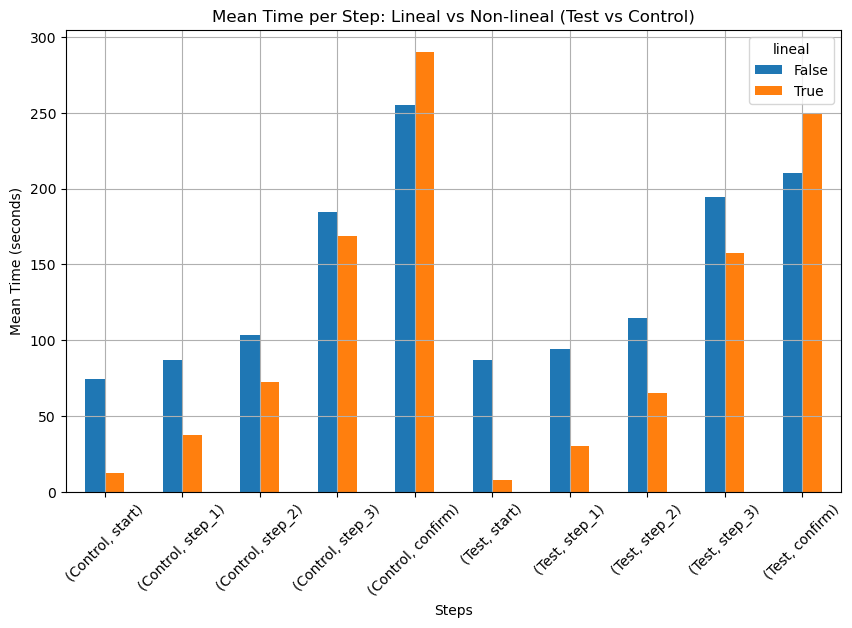

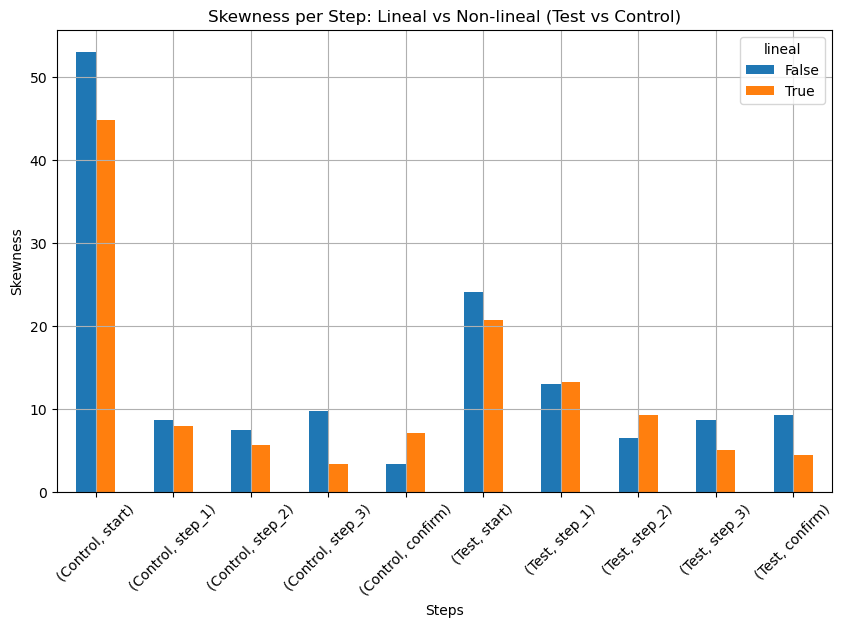

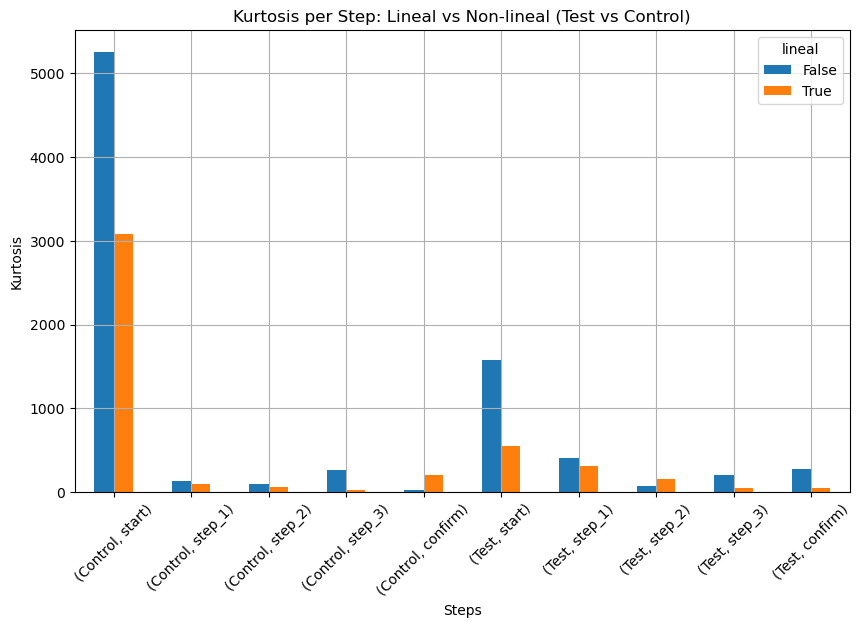

                                mean       skew     kurtosis
variation step    lineal                                    
Control   start   False    74.734189  53.047229  5255.297400
                  True     12.470965  44.862473  3083.136342
          step_1  False    87.124677   8.705658   131.364376
                  True     37.820651   7.914858    93.876989
          step_2  False   103.223602   7.533269    93.813236
                  True     72.524611   5.680865    54.416987
          step_3  False   184.890220   9.810619   263.983401
                  True    169.012851   3.421146    20.173019
          confirm False   255.394645   3.321375    24.136983
                  True    289.998462   7.132935   198.923587
Test      start   False    87.029394  24.079085  1571.256265
                  True      7.906919  20.696962   548.422417
          step_1  False    94.041990  12.987941   403.764662
                  True     30.073394  13.316284   310.397385
          step_2  False 

In [7]:
# Llamar a la función para estadísticas de tiempos y mostrar los datos
grouped_time_stats = calculate_and_plot_time_stats(df_vanguard, step_order)
print(grouped_time_stats)

----

## 5. Análisis de correlaciones entre variables

En esta sección se analizan las correlaciones entre diferentes variables relacionadas con los clientes, como **balance**, **edad**, **actividad** (suma de logins y llamadas a soporte), y **número de cuentas**. El objetivo es descubrir relaciones significativas que puedan influir en el comportamiento de los usuarios y su rendimiento en el proceso de navegación en la web.

### 5.1 Correlaciones de Pearson y Spearman

Se utilizan dos métodos para calcular las correlaciones:

- **Correlación de Pearson**: Mide la relación lineal entre dos variables continuas. Un valor cercano a 1 indica una fuerte correlación positiva, mientras que un valor cercano a -1 indica una fuerte correlación negativa. Un valor cercano a 0 indica que no hay correlación.
- **Correlación de Spearman**: Mide la correlación monótona entre dos variables, lo que permite detectar relaciones que no son estrictamente lineales.

Estas correlaciones permiten identificar si variables como el **balance** o la **edad** tienen una influencia directa sobre la **actividad** de los usuarios o sobre el número de cuentas que poseen.

#### Cálculo y visualización de las correlaciones

El análisis de correlaciones se realiza utilizando ambas métricas (Pearson y Spearman), y los resultados se visualizan mediante un heatmap para facilitar su interpretación.

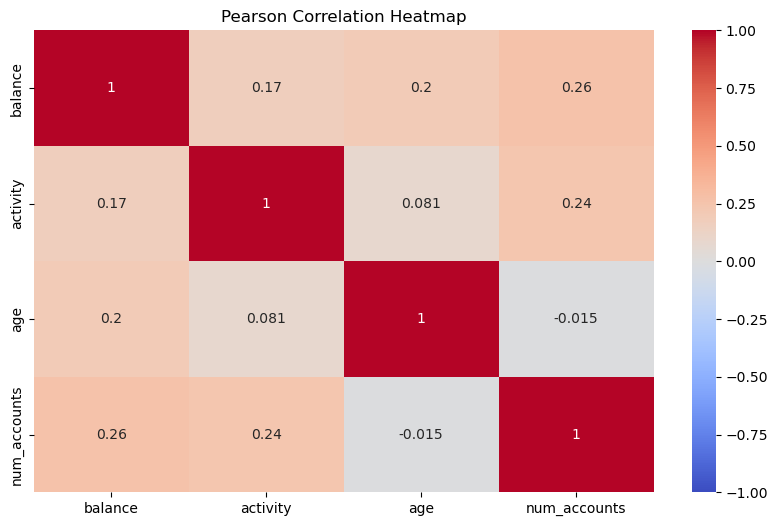

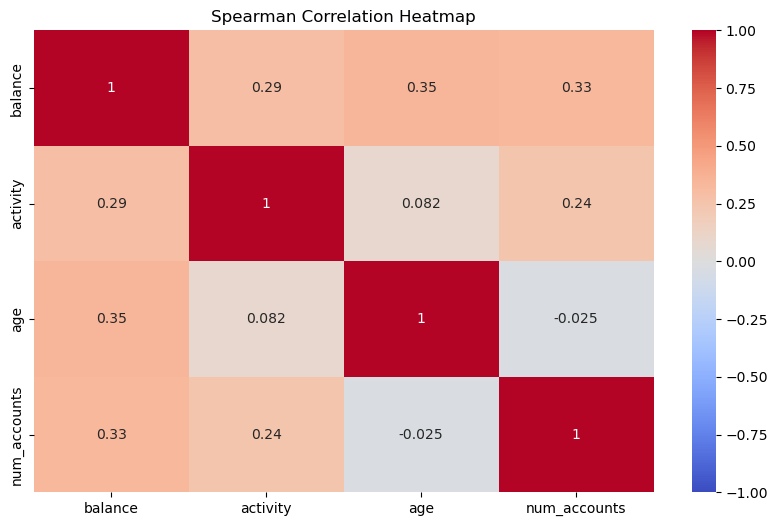

Pearson Correlation:
                balance  activity       age  num_accounts
balance       1.000000  0.171125  0.201108      0.264194
activity      0.171125  1.000000  0.080642      0.239670
age           0.201108  0.080642  1.000000     -0.014992
num_accounts  0.264194  0.239670 -0.014992      1.000000

Spearman Correlation:
                balance  activity       age  num_accounts
balance       1.000000  0.289570  0.346723      0.333328
activity      0.289570  1.000000  0.082088      0.243696
age           0.346723  0.082088  1.000000     -0.024591
num_accounts  0.333328  0.243696 -0.024591      1.000000


In [8]:
# Llamar a la función para calcular y visualizar las correlaciones
pearson_corr, spearman_corr = calculate_pearson_spearman_corr(df_vanguard)

# Mostrar los DataFrames de correlación después de los gráficos
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

----

## 6. Pruebas estadísticas

Para validar los resultados obtenidos y confirmar si las diferencias observadas entre los grupos Test (nueva versión de la web) y Control (versión antigua) son significativas, se realizan una serie de pruebas estadísticas. Estas pruebas permiten evaluar si los resultados obtenidos se deben al azar o si reflejan diferencias reales entre los grupos.

Entre las pruebas realizadas se incluyen:

- **Prueba Z**: Para comparar las tasas de finalización entre los grupos Test y Control.
- **T-test**: Para comparar los tiempos de finalización entre los usuarios de los grupos Test y Control, así como entre usuarios lineales y no lineales.
- **Prueba Mann-Whitney**: Para evaluar diferencias en tiempos entre los grupos cuando los datos no siguen una distribución normal.
- **Prueba Chi-square**: Para evaluar la asociación entre las variables categóricas (Test/Control y lineal/no lineal).
- **Cramér's V**: Para medir la fuerza de la asociación entre variables categóricas.

### 6.1 Prueba Z para tasas de finalización

La prueba Z se utiliza para comparar las **tasas de finalización** entre el grupo Test y el grupo Control. Esta prueba determina si la diferencia en las tasas de finalización es significativa o si podría haber ocurrido por azar.

#### Planteamiento de la hipótesis:

- **Hipótesis nula (H₀)**: No hay diferencia significativa entre las tasas de finalización de los grupos Test y Control.
- **Hipótesis alternativa (H₁)**: Existe una diferencia significativa entre las tasas de finalización de los grupos Test y Control.

Se calculan las tasas de finalización para ambos grupos y se realiza la prueba Z para evaluar si las diferencias observadas son estadísticamente significativas.

In [9]:
# Llamar a la función para realizar la prueba Z
stat, p_value = z_test_completion_rates(df_vanguard)

# Mostrar los resultados
print(f"Estadístico Z: {stat}")
print(f"Valor p: {p_value}")

# Decisión basada en el valor p
if p_value < 0.05:
    print("La diferencia en las tasas de finalización es estadísticamente significativa.")
else:
    print("La diferencia en las tasas de finalización NO es estadísticamente significativa.")


Estadístico Z: 3.1660086134803356
Valor p: 0.0015454621727767797
La diferencia en las tasas de finalización es estadísticamente significativa.


### 6.2 T-test para tiempos de finalización

El **T-test** se utiliza para comparar los **tiempos de finalización** entre los grupos Test y Control, así como entre usuarios lineales (aquellos que completan el proceso sin errores) y no lineales (aquellos que presentan errores o repeticiones). Este test permite evaluar si los tiempos medios de finalización difieren significativamente entre los grupos.

#### Planteamiento de la hipótesis:

- **Hipótesis nula (H₀)**: No hay diferencia significativa en los tiempos de finalización entre los grupos Test y Control.
- **Hipótesis alternativa (H₁)**: Existe una diferencia significativa en los tiempos de finalización entre los grupos Test y Control.

#### Comparación de tiempos de finalización entre Test y Control

Se filtran los datos para el paso **confirm**, que representa el final del proceso, y se aplica el **T-test** para comparar los tiempos medios de finalización entre el grupo Test y el grupo Control.

In [10]:
# Definir el paso donde realizar el análisis (en este caso 'confirm')
step = 'confirm'

# Llamar a la función para obtener los resultados del T-test
(t_stat_lineal, p_value_lineal), (t_stat_non_lineal, p_value_non_lineal) = t_test_time_per_step(df_vanguard, step)

# Resultados para usuarios lineales
print("Resultados para usuarios lineales:")
print(f"Estadístico t: {t_stat_lineal}")
print(f"Valor p: {p_value_lineal}")

if p_value_lineal < 0.05:
    print("La diferencia en los tiempos de finalización es estadísticamente significativa para usuarios lineales.")
else:
    print("La diferencia en los tiempos de finalización NO es estadísticamente significativa para usuarios lineales.")

# Resultados para usuarios no lineales
print("\nResultados para usuarios no lineales:")
print(f"Estadístico t: {t_stat_non_lineal}")
print(f"Valor p: {p_value_non_lineal}")

if p_value_non_lineal < 0.05:
    print("La diferencia en los tiempos de finalización es estadísticamente significativa para usuarios no lineales.")
else:
    print("La diferencia en los tiempos de finalización NO es estadísticamente significativa para usuarios no lineales.")


Resultados para usuarios lineales:
Estadístico t: -13.329832250819301
Valor p: 2.183596584825488e-40
La diferencia en los tiempos de finalización es estadísticamente significativa para usuarios lineales.

Resultados para usuarios no lineales:
Estadístico t: -9.37222108044775
Valor p: 8.111545008015922e-21
La diferencia en los tiempos de finalización es estadísticamente significativa para usuarios no lineales.


### 6.3 Prueba Mann-Whitney U para tiempos de finalización

La **prueba Mann-Whitney U** es una alternativa no paramétrica al T-test que se utiliza cuando los datos no siguen una distribución normal. En este caso, se emplea para comparar los tiempos de finalización entre los grupos Test y Control, así como entre los usuarios lineales y no lineales.

#### Planteamiento de la hipótesis:

- **Hipótesis nula (H₀)**: No hay diferencia significativa en los tiempos de finalización entre los grupos Test y Control.
- **Hipótesis alternativa (H₁)**: Existe una diferencia significativa en los tiempos de finalización entre los grupos Test y Control.

#### Comparación entre Test y Control

Se aplica la prueba Mann-Whitney U para comparar los tiempos de finalización entre los grupos Test y Control. Esta prueba es más robusta cuando los datos no están normalmente distribuidos, ya que evalúa si la distribución de los tiempos es significativamente diferente entre ambos grupos.

#### Comparación entre usuarios lineales y no lineales

Además, se aplica la prueba Mann-Whitney U para comparar los tiempos de finalización entre usuarios lineales y no lineales, lo que permite evaluar si hay diferencias significativas en los tiempos de finalización según el comportamiento de los usuarios.


In [11]:
# Prueba Mann-Whitney para comparar Test vs Control
u_statistic_variation, p_value_variation = mann_whitney_test_variation(df_vanguard)

print(f"U-statistic (Test vs Control): {u_statistic_variation}")
print(f"P-value (Test vs Control): {p_value_variation}")

if p_value_variation < 0.05:
    print("La diferencia entre los grupos Test y Control es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos Test y Control.")

# Prueba Mann-Whitney para comparar usuarios lineales vs no lineales
u_statistic_lineal, p_value_lineal = mann_whitney_test_lineal(df_pt)

print(f"U-statistic (Lineal vs No Lineal): {u_statistic_lineal}")
print(f"P-value (Lineal vs No Lineal): {p_value_lineal}")

if p_value_lineal < 0.05:
    print("La diferencia entre usuarios lineales y no lineales es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa entre usuarios lineales y no lineales.")


U-statistic (Test vs Control): 12551390908.0
P-value (Test vs Control): 1.5932279515685857e-08
La diferencia entre los grupos Test y Control es estadísticamente significativa.
U-statistic (Lineal vs No Lineal): 12793689969.5
P-value (Lineal vs No Lineal): 7.287884150499961e-277
La diferencia entre usuarios lineales y no lineales es estadísticamente significativa.


----

## 7. Prueba Chi-square y Cramér's V

En este apartado se utiliza la **prueba Chi-square** para evaluar la asociación entre dos variables categóricas: la versión de la web utilizada (Test o Control) y si el proceso fue completado de manera lineal o no. Además, se calcula el **Cramér's V** para medir la fuerza de la asociación entre estas variables.

La **prueba Chi-square** se utiliza para determinar si existe una relación significativa entre las variables **Test/Control** y **Lineal/No lineal**. Esta prueba evalúa si la distribución observada en las categorías es diferente de lo que se esperaría si no hubiera relación entre las variables.

#### Planteamiento de la hipótesis:

- **Hipótesis nula (H₀)**: No hay asociación entre el grupo (Test/Control) y el comportamiento de los usuarios (Lineal/No lineal).
- **Hipótesis alternativa (H₁)**: Existe una asociación significativa entre el grupo (Test/Control) y el comportamiento de los usuarios (Lineal/No lineal).

Se construye una tabla de contingencia para las dos variables y se aplica la prueba Chi-square.

In [12]:
# Llamar a la función para obtener los resultados del Chi-square y Cramér's V
chi2, p_value, cramers_v = chi_square_and_cramers_v(df_vanguard)

# Mostrar los resultados
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Cramér's V: {cramers_v}")

# Interpretación de resultados
if p_value < 0.05:
    print("La asociación entre 'variation' y 'lineal' es estadísticamente significativa.")
else:
    print("No hay una asociación estadísticamente significativa entre 'variation' y 'lineal'.")

print(f"La fuerza de la asociación medida por Cramér's V es: {cramers_v}")


Chi-square statistic: 133.72983155146625
P-value: 6.259980648958378e-31
Cramér's V: 0.020535263416396086
La asociación entre 'variation' y 'lineal' es estadísticamente significativa.
La fuerza de la asociación medida por Cramér's V es: 0.020535263416396086


-----

## Insights

-----

### 3.1 Tasas de finalización y no finalización

#### Tasa de finalización (lineal=True)

- En el grupo **Control** (versión antigua de la web), el **46.05%** de los usuarios completaron el proceso de manera lineal, es decir, sin errores ni repeticiones de pasos.
- En el grupo **Test** (nueva versión de la web), el **47.46%** de los usuarios completaron el proceso de manera lineal.
  
**Insight**: La tasa de finalización en el grupo Test es ligeramente superior a la del grupo Control. Esto sugiere que el nuevo diseño de la web podría estar facilitando que más usuarios completen el proceso sin errores.

#### Tasa de no finalización (lineal=False)

- En el grupo **Control**, el **53.94%** de los usuarios no completaron el proceso de manera lineal, es decir, cometieron errores o repitieron pasos.
- En el grupo **Test**, el **52.53%** de los usuarios no completaron el proceso de manera lineal.

**Insight**: Aunque el porcentaje de usuarios que no completaron el proceso sigue siendo alto, es menor en el grupo Test en comparación con el grupo Control. Esto podría indicar que la nueva versión de la web está mejorando, aunque de forma moderada, la experiencia de los usuarios al reducir los errores.

#### Suma de tasas (debería ser cercana a 1)

- Tanto en el grupo **Control** como en el grupo **Test**, la suma de las tasas de finalización y no finalización es exactamente **1.0**, lo que indica que las categorías se distribuyen correctamente y que los datos están completos.

**Insight**: La suma correcta de las tasas para ambos grupos garantiza que el análisis está bien segmentado y que se han considerado todas las interacciones de los usuarios. Los resultados reflejan con precisión el comportamiento de los usuarios en ambas versiones de la web.

----

### 3.2 Tasa de errores

La tasa de errores analiza la proporción de usuarios que cometieron errores o repitieron pasos en cada fase del proceso. A continuación se presentan las tasas de errores para los grupos **Control** (versión antigua) y **Test** (nueva versión), diferenciando entre usuarios que completaron el proceso de manera **lineal** (sin errores) y **no lineal** (con errores).

#### Tasa de errores por paso

| Paso       | Grupo   | Lineal   | Tasa de error |
|------------|---------|----------|---------------|
| **Start**  | Control | No       | 23.37%        |
|            | Test    | No       | 34.62%        |
| **Step 1** | Control | No       | 15.18%        |
|            | Test    | No       | 20.86%        |
| **Step 2** | Control | No       | 22.90%        |
|            | Test    | No       | 21.29%        |
| **Step 3** | Control | No       | 10.38%        |
|            | Test    | No       | 7.91%         |
| **Confirm**| Control | No       | 7.68%         |
|            | Test    | No       | 8.78%         |

#### Usuarios lineales

- Tanto en el grupo **Control** como en el grupo **Test**, los usuarios que completaron el proceso de manera **lineal** (sin errores) no presentaron tasas de error en ningún paso. Esto sugiere que los usuarios que siguen el flujo de manera correcta no encuentran obstáculos significativos en ninguna de las versiones de la web.

#### Usuarios no lineales

- En el grupo **Control**, las tasas de error en los pasos clave fueron:
  - **Start**: 23.37%
  - **Step 1**: 15.18%
  - **Step 2**: 22.90%
  - **Step 3**: 10.38%
  - **Confirm**: 7.68%
  
- En el grupo **Test**, las tasas de error fueron ligeramente diferentes:
  - **Start**: 34.62%
  - **Step 1**: 20.86%
  - **Step 2**: 21.29%
  - **Step 3**: 7.91%
  - **Confirm**: 8.78%

#### Insight

- La tasa de errores es más alta en el paso **Start** para los usuarios **no lineales** en el grupo **Test** (34.62%) que en el grupo **Control** (23.37%). Esto podría indicar que la nueva versión de la web presenta ciertos problemas al inicio del proceso que dificultan el avance de los usuarios.
  
- En general, los usuarios del grupo **Test** muestran tasas de error más altas en los primeros pasos, aunque las tasas de error en los últimos pasos (**Step 3** y **Confirm**) son más bajas en comparación con el grupo **Control**. Esto sugiere que la nueva versión de la web podría estar causando confusión inicial, pero una vez superados los primeros pasos, los usuarios tienen menos problemas en los pasos finales.

- **Usuarios lineales**: No hay errores registrados en ninguno de los pasos para los usuarios lineales en ambos grupos, lo que reafirma que aquellos que siguen el proceso correctamente no encuentran problemas significativos en el flujo de la web.


-----

### 4.1 Tiempos promedio por paso

A continuación se muestran los tiempos promedio que los usuarios tardaron en cada paso del proceso, diferenciando entre los grupos **Control** (versión antigua de la web) y **Test** (nueva versión de la web), así como entre usuarios **lineales** (que completaron el proceso sin errores) y **no lineales** (que cometieron errores o repitieron pasos).

#### Tiempos promedio por paso y grupo

| Paso       | Grupo   | Lineal   | Tiempo promedio (segundos) |
|------------|---------|----------|----------------------------|
| **Start**  | Control | No       | 74.73                       |
|            | Test    | No       | 87.03                       |
|            | Control | Sí       | 12.47                       |
|            | Test    | Sí       | 7.91                        |
| **Step 1** | Control | No       | 87.12                       |
|            | Test    | No       | 94.04                       |
|            | Control | Sí       | 37.82                       |
|            | Test    | Sí       | 30.07                       |
| **Step 2** | Control | No       | 103.22                      |
|            | Test    | No       | 114.63                      |
|            | Control | Sí       | 72.52                       |
|            | Test    | Sí       | 65.06                       |
| **Step 3** | Control | No       | 184.89                      |
|            | Test    | No       | 194.49                      |
|            | Control | Sí       | 169.01                      |
|            | Test    | Sí       | 157.54                      |
| **Confirm**| Control | No       | 255.39                      |
|            | Test    | No       | 210.02                      |
|            | Control | Sí       | 290.00                      |
|            | Test    | Sí       | 250.06                      |

#### Insight

- **Usuarios no lineales**: En general, los usuarios no lineales en el grupo **Test** tardan más tiempo en completar cada paso en comparación con el grupo **Control**, especialmente en los primeros pasos (**Start** y **Step 1**). En el paso **Start**, los usuarios no lineales del grupo **Test** tienen un tiempo promedio de **87.03 segundos**, mientras que los del grupo **Control** tardan **74.73 segundos**. Esto sugiere que el grupo **Test** puede estar experimentando mayor confusión o dificultades al inicio del proceso.
  
- **Usuarios lineales**: Los usuarios que completan el proceso de manera lineal en el grupo **Test** muestran tiempos menores en todos los pasos en comparación con los usuarios lineales del grupo **Control**. Por ejemplo, en el paso **Start**, los usuarios lineales del grupo **Test** tardan solo **7.91 segundos**, mientras que los del grupo **Control** tardan **12.47 segundos**. Esto podría indicar que el nuevo diseño de la web es más eficiente para aquellos usuarios que no cometen errores.

- **Pasos intermedios**: En los pasos **Step 2** y **Step 3**, los tiempos promedio para los usuarios lineales y no lineales son más altos en ambos grupos, lo que refleja la complejidad de estas etapas en el proceso. Sin embargo, los usuarios del grupo **Test** logran reducir ligeramente los tiempos en comparación con el grupo **Control**, lo que sugiere que la nueva versión de la web podría estar mejorando la experiencia en estas fases.

- **Paso Confirm**: En el paso final (**Confirm**), los usuarios no lineales del grupo **Control** tardan considerablemente más (**255.39 segundos**) en comparación con los usuarios no lineales del grupo **Test** (**210.02 segundos**). Esto indica que, a pesar de los problemas en los primeros pasos, la nueva versión de la web ayuda a los usuarios a completar el proceso de manera más rápida en la última etapa.

-----

### 4.2 Estadísticas de tiempos (Media, Skewness y Kurtosis)

A continuación, se presentan las **estadísticas descriptivas** de los tiempos empleados por los usuarios en cada paso, diferenciando entre los grupos **Control** (versión antigua) y **Test** (nueva versión), así como entre usuarios **lineales** (sin errores) y **no lineales** (con errores). Las estadísticas incluyen la **media (mean)**, la **asimetría (skewness)** y la **curtosis (kurtosis)**, que nos ayudan a entender la distribución de los tiempos en cada paso.

#### Media, Skewness y Kurtosis por paso y grupo

| Paso       | Grupo   | Lineal   | Media (s) | Skewness  | Kurtosis   |
|------------|---------|----------|-----------|-----------|------------|
| **Start**  | Control | No       | 74.73     | 53.05     | 5255.30    |
|            |         | Sí       | 12.47     | 44.86     | 3083.14    |
|            | Test    | No       | 87.03     | 24.08     | 1571.26    |
|            |         | Sí       | 7.91      | 20.70     | 548.42     |
| **Step 1** | Control | No       | 87.12     | 8.71      | 131.36     |
|            |         | Sí       | 37.82     | 7.91      | 93.88      |
|            | Test    | No       | 94.04     | 12.99     | 403.76     |
|            |         | Sí       | 30.07     | 13.32     | 310.40     |
| **Step 2** | Control | No       | 103.22    | 7.53      | 93.81      |
|            |         | Sí       | 72.52     | 5.68      | 54.42      |
|            | Test    | No       | 114.63    | 6.54      | 68.93      |
|            |         | Sí       | 65.06     | 9.28      | 158.77     |
| **Step 3** | Control | No       | 184.89    | 9.81      | 263.98     |
|            |         | Sí       | 169.01    | 3.42      | 20.17      |
|            | Test    | No       | 194.49    | 8.63      | 204.90     |
|            |         | Sí       | 157.54    | 5.07      | 51.84      |
| **Confirm**| Control | No       | 255.39    | 3.32      | 24.14      |
|            |         | Sí       | 290.00    | 7.13      | 198.92     |
|            | Test    | No       | 210.02    | 9.27      | 280.21     |
|            |         | Sí       | 250.06    | 4.49      | 46.82      |

#### Insights

1. **Media (mean)**: 
   - Los usuarios **no lineales** del grupo **Test** tienden a pasar más tiempo en los pasos iniciales (**Start**, **Step 1**) en comparación con los del grupo **Control**. Por ejemplo, en el paso **Start**, el grupo **Test** tiene un tiempo promedio de **87.03 segundos**, mientras que el grupo **Control** tiene un promedio de **74.73 segundos**.
   - Los usuarios **lineales** en el grupo **Test** completan los pasos más rápido que los del grupo **Control** en todos los pasos. En el paso **Start**, los usuarios lineales de **Test** tardan **7.91 segundos** en promedio, mientras que los de **Control** tardan **12.47 segundos**.
   
2. **Skewness (Asimetría)**: 
   - En general, la **asimetría** es muy alta en todos los pasos, lo que indica que la mayoría de los usuarios completan los pasos en menos tiempo, pero hay una pequeña proporción de usuarios que tarda mucho más tiempo en completarlos, lo que crea una distribución sesgada hacia la derecha.
   - La asimetría es particularmente alta en el paso **Start** tanto en el grupo **Control** como en el **Test**, especialmente para los usuarios no lineales, lo que sugiere que algunos usuarios experimentan retrasos significativos en este paso.

3. **Kurtosis**: 
   - Los valores de **kurtosis** también son extremadamente altos, lo que indica la presencia de **valores atípicos** o tiempos extremos en los datos. Esto es particularmente evidente en el paso **Start**, donde el grupo **Control** muestra una curtosis de **5255.30** y el grupo **Test** de **1571.26** para los usuarios no lineales.
   - Este patrón sugiere que una pequeña cantidad de usuarios no lineales experimenta grandes demoras, lo que afecta de manera desproporcionada los tiempos promedio y genera picos en la distribución.

#### Conclusión

- Los tiempos promedio son generalmente más altos para los usuarios no lineales en el grupo **Test**, lo que podría indicar que la nueva versión de la web presenta ciertos obstáculos que retrasan a los usuarios en los primeros pasos.
- La alta **asimetría** y **kurtosis** en ambos grupos indican que la mayoría de los usuarios completan los pasos relativamente rápido, pero una pequeña proporción de usuarios experimenta tiempos de finalización extremadamente largos, lo que podría estar relacionado con errores o dificultades de navegación.


-----

### 5.1 Correlación de Variables: Pearson y Spearman

En este apartado, presentamos las **correlaciones** entre varias variables clave del estudio, como el **balance** de los clientes, su **actividad** (número de logins y llamadas), la **edad**, y el número de **cuentas** que poseen. Se realizaron análisis de correlación utilizando dos métodos:

1. **Pearson Correlation**: mide la relación lineal entre dos variables continuas.
2. **Spearman Correlation**: mide relaciones monótonas, adecuado para detectar correlaciones no lineales.

#### Matriz de Correlación de Pearson

| Variable       | Balance | Activity | Age   | Num_accounts |
|----------------|---------|----------|-------|--------------|
| **Balance**    | 1.000   | 0.171    | 0.201 | 0.264        |
| **Activity**   | 0.171   | 1.000    | 0.081 | 0.240        |
| **Age**        | 0.201   | 0.081    | 1.000 | -0.015       |
| **Num_accounts**| 0.264   | 0.240    | -0.015| 1.000        |

#### Matriz de Correlación de Spearman

| Variable       | Balance | Activity | Age   | Num_accounts |
|----------------|---------|----------|-------|--------------|
| **Balance**    | 1.000   | 0.290    | 0.347 | 0.333        |
| **Activity**   | 0.290   | 1.000    | 0.082 | 0.244        |
| **Age**        | 0.347   | 0.082    | 1.000 | -0.025       |
| **Num_accounts**| 0.333   | 0.244    | -0.025| 1.000        |

#### Insights

- **Balance y Número de Cuentas**:
  - En ambas matrices, observamos que la correlación entre el **balance** y el **número de cuentas** es moderadamente positiva. Esto significa que los clientes con más cuentas tienden a tener balances más altos. En la correlación de **Pearson**, el valor es de **0.264**, y en **Spearman**, es de **0.333**, sugiriendo que esta relación puede no ser completamente lineal.

- **Balance y Edad**:
  - La correlación entre el **balance** y la **edad** también es moderadamente positiva en ambos casos (**0.201** en Pearson y **0.347** en Spearman). Esto indica que, en general, los clientes más mayores tienden a tener balances más altos. La mayor correlación en **Spearman** sugiere que esta relación podría ser más fuerte cuando se tiene en cuenta una relación monótona no lineal.

- **Balance y Actividad**:
  - La correlación entre el **balance** y la **actividad** es baja, pero positiva (**0.171** en Pearson y **0.290** en Spearman), lo que sugiere que los clientes con balances más altos tienden a ser más activos, aunque esta relación no es muy fuerte. La diferencia entre Pearson y Spearman indica que la relación podría no ser completamente lineal.

- **Actividad y Número de Cuentas**:
  - En ambas matrices, existe una correlación positiva moderada entre la **actividad** y el **número de cuentas** (**0.240** en Pearson y **0.244** en Spearman). Esto significa que los clientes con más cuentas tienden a ser más activos en la plataforma.

- **Edad y Actividad**:
  - Las correlaciones entre la **edad** y la **actividad** son muy bajas en ambos análisis (**0.081** en Pearson y **0.082** en Spearman), lo que sugiere que no hay una relación significativa entre la edad de los clientes y su nivel de actividad.

#### Conclusión

- Las correlaciones más fuertes se observan entre el **balance** y el **número de cuentas**, así como entre el **balance** y la **edad**. Los clientes más mayores y con más cuentas tienden a tener balances más altos.
- La **actividad** de los clientes muestra una correlación moderada con el número de cuentas, lo que sugiere que los clientes con más cuentas también interactúan más con la plataforma.
- Las correlaciones bajas entre la **edad** y la **actividad** indican que la edad de los clientes no parece influir mucho en su comportamiento en la plataforma.


-----

### 6.1 Prueba Z para la tasa de finalización

Se realizó una prueba Z para comparar las **tasas de finalización** entre el grupo **Test** (nueva versión de la web) y el grupo **Control** (versión antigua de la web).

#### Resultados de la prueba Z:

- **Estadístico Z**: 3.166
- **Valor p**: 0.0015

#### Interpretación:

- El valor p es menor que **0.05**, lo que significa que podemos rechazar la hipótesis nula.
- **Conclusión**: La diferencia en las tasas de finalización entre los usuarios del grupo **Test** y **Control** es **estadísticamente significativa**. Esto sugiere que el diseño de la nueva versión de la web (Test) ha tenido un impacto significativo en la tasa de finalización en comparación con la versión antigua (Control).

-----

### 6.2 T-test para usuarios lineales y no lineales

Se realizaron pruebas T para comparar los **tiempos de finalización** entre el grupo **Test** y el grupo **Control**, diferenciando entre usuarios que completaron el proceso de manera **lineal** (sin errores) y **no lineal** (con errores).

#### Resultados para usuarios lineales:

- **Estadístico t**: -13.33
- **Valor p**: 2.18e-40

#### Resultados para usuarios no lineales:

- **Estadístico t**: -9.37
- **Valor p**: 8.11e-21

#### Interpretación:

- En ambos casos (usuarios lineales y no lineales), el **valor p** es extremadamente pequeño, mucho menor que **0.05**, lo que significa que podemos rechazar la hipótesis nula en ambos escenarios.
- **Conclusión**: La diferencia en los **tiempos de finalización** entre los grupos **Test** y **Control** es **estadísticamente significativa** tanto para los usuarios que completaron el proceso de forma **lineal** como para aquellos que lo completaron de manera **no lineal**. Esto indica que la versión de la web utilizada (Test o Control) afecta significativamente el tiempo que los usuarios tardan en completar el proceso, independientemente de si lo hacen de manera lineal o no.

-----

### 6.3 Prueba Mann-Whitney U: Comparación entre grupos Test vs Control y usuarios Lineales vs No Lineales

Se realizó la prueba **Mann-Whitney U** para comparar los **tiempos de finalización** entre los grupos **Test** y **Control**, así como entre usuarios **lineales** y **no lineales**.

#### Resultados para Test vs Control:

- **U-statistic**: 12,551,390,908.0
- **Valor p**: 1.59e-08

#### Resultados para Lineal vs No Lineal:

- **U-statistic**: 12,793,689,969.5
- **Valor p**: 7.29e-277

#### Interpretación:

- En ambos casos, el **valor p** es extremadamente pequeño, mucho menor que **0.05**, lo que significa que podemos rechazar la hipótesis nula.
- **Conclusión**:
  - La diferencia entre los grupos **Test** y **Control** es **estadísticamente significativa**, lo que indica que los tiempos de finalización difieren de manera significativa entre los usuarios que utilizan la versión nueva (Test) y la versión antigua (Control) de la web.
  - Asimismo, la diferencia entre usuarios **lineales** y **no lineales** es **estadísticamente significativa**, lo que sugiere que completar el proceso de manera lineal o no lineal tiene un impacto importante en los tiempos de finalización.

-----

### 7. Prueba Chi-square y Cramér's V

Se realizó una prueba **Chi-square** para analizar la asociación entre las variables **'variation'** (grupo Test vs Control) y **'lineal'** (usuarios que completan el proceso de forma lineal o no).

#### Resultados:

- **Chi-square statistic**: 133.73
- **Valor p**: 6.26e-31
- **Cramér's V**: 0.0205

#### Interpretación:

- El **valor p** es extremadamente pequeño, mucho menor que **0.05**, lo que nos permite rechazar la hipótesis nula.
- **Conclusión**: La asociación entre las variables **'variation'** y **'lineal'** es **estadísticamente significativa**, lo que sugiere que el tipo de web utilizada (Test o Control) afecta de manera significativa si un usuario completa el proceso de manera lineal o no.
- Sin embargo, el valor de **Cramér's V** es **0.0205**, lo que indica que la **fuerza de la asociación** es **muy débil**. Esto significa que, aunque existe una diferencia estadísticamente significativa entre los grupos Test y Control en términos de linealidad, el impacto real de esta asociación es pequeño.